In [19]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import thinkstats2
import math
import numpy
import pywt
import matplotlib.pyplot as mplib

%precision 3
%matplotlib inline

PI2 = 2 * math.pi
i = complex(0, 1)

In [20]:
wave = thinkdsp.read_wave('100475__iluppai__saxophone-weep.wav')
wave.normalize()
wave.make_audio()

In [21]:
wave.ys

array([-0.001,  0.002,  0.   , ..., -0.004, -0.002, -0.001])

In [22]:
wave2 = thinkdsp.Wave(ys=wave.ys,framerate=44000)

In [23]:
wave2seg = wave2.segment(start=1.2, duration=4)
wave2seg.apodize()
wave2seg.make_audio()
# wave2.make_audio()

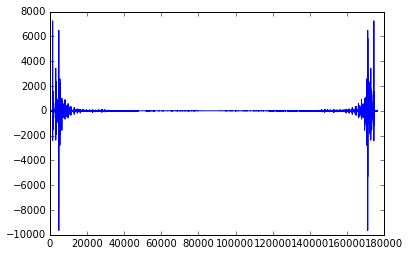

In [24]:
# spec = wave2.make_spectrum()
# thinkplot.Show()
spec = numpy.fft.fft(wave2seg.ys)
mplib.plot(spec)
# mplib.xlim([0,20000])

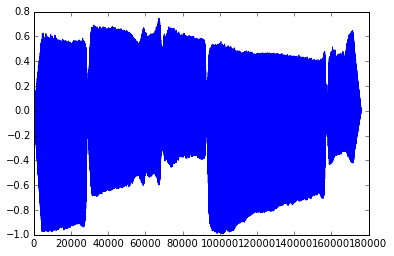

In [25]:
mplib.plot(wave2seg.ys)

In [26]:
cA, cD = pywt.dwt(wave2seg.ys, 'Haar')

In [27]:
z = numpy.zeros(len(cD))
zA = numpy.zeros(len(cA))

In [28]:
detail = pywt.idwt(zA, cD, 'Haar')

In [29]:
wave_detail = thinkdsp.Wave(ys=detail, framerate=44000)
wave_detail.make_audio()

(-1, 0.800)

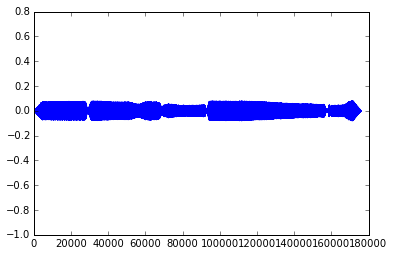

In [30]:
mplib.plot(wave_detail.ys)
mplib.ylim([-1,0.8])

In [31]:
approx = pywt.idwt(cA, z, 'Haar')

In [32]:
wave_approx = thinkdsp.Wave(ys=approx, framerate=44000)
wave_approx.make_audio()

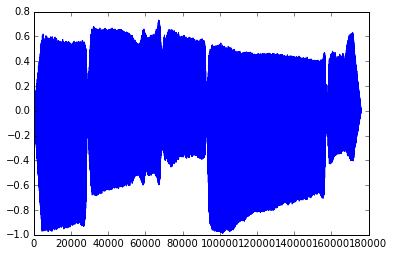

In [33]:
mplib.plot(wave_approx.ys)

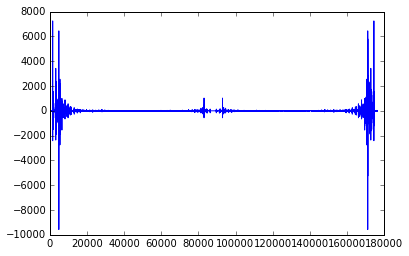

In [34]:
spec = numpy.fft.fft(approx)
mplib.plot(spec)
# mplib.xlim([0,20000])

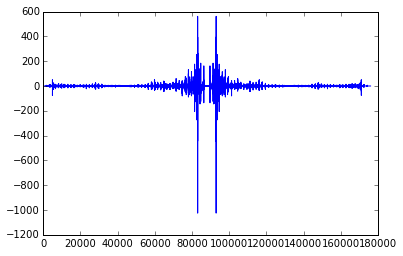

In [35]:
spec = numpy.fft.fft(detail)
mplib.plot(spec)

(-1, 0.800)

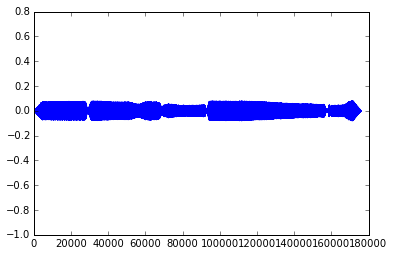

In [36]:
mplib.plot(wave2seg.ys-wave_approx.ys)
mplib.ylim([-1,0.8])

In [37]:
wave_diff = thinkdsp.Wave(ys=wave2seg.ys-wave_approx.ys, framerate=44000)
wave_diff.make_audio()

In [38]:
wave_avg = thinkdsp.Wave(ys=(wave2seg.ys+wave_approx.ys)/2, framerate=44000)
wave_avg.make_audio()

In [42]:
wave2seg.write(filename="orig.wav")
wave2seg.make_audio()

Writing orig.wav


In [43]:
wave_approx.write(filename="approx.wav")
wave_approx.make_audio()

Writing approx.wav


In [44]:
wave_detail.write(filename="detail.wav")
wave_detail.make_audio()

Writing detail.wav
